In [1]:
import time
import torch

import pathpy as pp2
import pathpyG as pp
from matplotlib import pyplot as plt
pp.config['torch']['device'] = 'cuda'
print('Running on', pp.config['torch']['device'])

Running on cuda


In [7]:
p = pp.DAGData.from_ngram('../data/tube_paths_train.ngram')

In [8]:
m = pp.MultiOrderModel.from_DAGs(p, max_order=2)
g2 = m.layers[2]
print(g2.N)
print(g2.M)
print(g2['edge_weight'].sum().item())

646
1139
634916.0


In [4]:
for e in g2.edges:
    print(e, g2['edge_weight', e[0], e[1]])

(('Southwark', 'Waterloo'), ('Waterloo', 'Embankment')) tensor(279., device='cuda:0')
(('Southwark', 'Waterloo'), ('Waterloo', 'Westminster')) tensor(3875., device='cuda:0')
(('Southwark', 'Waterloo'), ('Waterloo', 'Lambeth North')) tensor(45., device='cuda:0')
(('Southwark', 'Waterloo'), ('Waterloo', 'Kennington')) tensor(640., device='cuda:0')
(('Southwark', 'London Bridge'), ('London Bridge', 'Bank / Monument')) tensor(3604., device='cuda:0')
(('Southwark', 'London Bridge'), ('London Bridge', 'Bermondsey')) tensor(1002., device='cuda:0')
(('Southwark', 'London Bridge'), ('London Bridge', 'Borough')) tensor(52., device='cuda:0')
(('Waterloo', 'Southwark'), ('Southwark', 'London Bridge')) tensor(4777., device='cuda:0')
(('Waterloo', 'Embankment'), ('Embankment', 'Temple')) tensor(53., device='cuda:0')
(('Waterloo', 'Embankment'), ('Embankment', 'Charing Cross')) tensor(229., device='cuda:0')
(('Waterloo', 'Westminster'), ('Westminster', 'Green Park')) tensor(3439., device='cuda:0')
((

In [5]:
g2['edge_weight', ('Southwark', 'Waterloo'), ('Waterloo', 'Embankment')]

tensor(279., device='cuda:0')

In [6]:
paths = pp2.Paths.read_file("../data/tube_paths_train.ngram", max_subpath_length=2)
g2 = pp2.HigherOrderNetwork(paths, k=2)
print(g2)

2024-03-26 21:55:20 [Severity.INFO]	Reading ngram data ... 
2024-03-26 21:55:21 [Severity.INFO]	finished. Read 61748 paths with maximum length 35
2024-03-26 21:55:21 [Severity.INFO]	Calculating sub path statistics ... 
2024-03-26 21:55:22 [Severity.INFO]	finished.
Higher-order network of order k = 2

Nodes:				646
Links:				1139
Total weight (subpaths/longest paths):	12182604.0/173868.0



# Pathpy 2.0

2024-03-26 22:00:59 [Severity.INFO]	Reading ngram data ... 
2024-03-26 22:01:00 [Severity.INFO]	finished. Read 61748 paths with maximum length 35
2024-03-26 22:01:00 [Severity.INFO]	Calculating sub path statistics ... 
2024-03-26 22:01:01 [Severity.INFO]	finished.
Higher-order network of order k = 1

Nodes:				268
Links:				646
Total weight (subpaths/longest paths):	14404381.0/99956.0

2024-03-26 22:01:01 [Severity.INFO]	Reading ngram data ... 
2024-03-26 22:01:02 [Severity.INFO]	finished. Read 61748 paths with maximum length 35
2024-03-26 22:01:02 [Severity.INFO]	Calculating sub path statistics ... 
2024-03-26 22:01:03 [Severity.INFO]	finished.
Higher-order network of order k = 2

Nodes:				646
Links:				1139
Total weight (subpaths/longest paths):	12182604.0/173868.0

2024-03-26 22:01:03 [Severity.INFO]	Reading ngram data ... 
2024-03-26 22:01:04 [Severity.INFO]	finished. Read 61748 paths with maximum length 35
2024-03-26 22:01:04 [Severity.INFO]	Calculating sub path statistics ... 
2

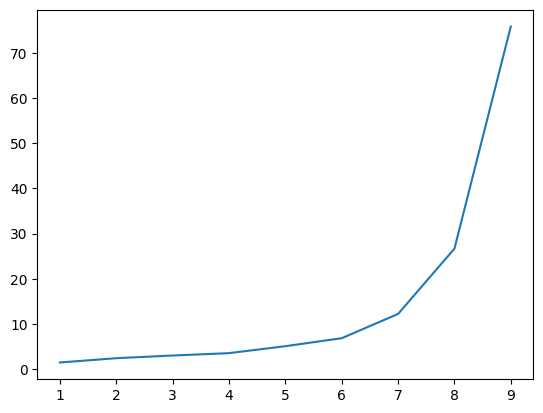

In [11]:
ks = range(1,10)
times = []
for k in ks:
    start = time.time() 
    paths = pp2.Paths.read_file("../data/tube_paths_train.ngram", max_subpath_length=k)
    g2 = pp2.HigherOrderNetwork(paths, k=k)
    print(g2)
    elapsed_pp = time.time()-start
    times.append(elapsed_pp)
plt.plot(ks, times)

# pathpyG (GPU)

In [9]:
pp.config['torch']['device'] = 'cuda:0'

In [10]:
ks = range(1,10)
times_new_gpu = []
for k in ks:
    start = time.time()
    p = pp.DAGData.from_ngram('../data/tube_paths_train.ngram')
    m = pp.MultiOrderModel.from_DAGs(p, max_order=k)
    print(m.layers[k])
    print('---')
    elapsed_new = time.time()-start
    times_new_gpu.append(elapsed_new)

MultiOrderModel with max. order 1
---
MultiOrderModel with max. order 2
---
MultiOrderModel with max. order 3
---
MultiOrderModel with max. order 4
---
MultiOrderModel with max. order 5
---
MultiOrderModel with max. order 6
---
MultiOrderModel with max. order 7
---
MultiOrderModel with max. order 8
---
MultiOrderModel with max. order 9
---


# pathpyG (CPU)

In [12]:
pp.config['torch']['device'] = 'cpu'

In [13]:
ks = range(1,10)
times_new_cpu = []
for k in ks:
    start = time.time()
    p = pp.DAGData.from_ngram('../data/tube_paths_train.ngram')
    m = pp.MultiOrderModel.from_DAGs(p, max_order=k)
    print(m.layers[k])
    print('---')
    elapsed_new = time.time()-start
    times_new_cpu.append(elapsed_new)

Directed graph with 268 nodes and 646 edges

Node attributes
	node_sequence		<class 'torch.Tensor'> -> torch.Size([268, 1])

Edge attributes
	edge_weight		<class 'torch.Tensor'> -> torch.Size([646])

Graph attributes
	num_nodes		<class 'int'>

---
Directed graph with 646 nodes and 1139 edges

Node attributes
	node_sequence		<class 'torch.Tensor'> -> torch.Size([646, 2])

Edge attributes
	edge_weight		<class 'torch.Tensor'> -> torch.Size([1139])

Graph attributes
	num_nodes		<class 'int'>

---
Directed graph with 1139 nodes and 1869 edges

Node attributes
	node_sequence		<class 'torch.Tensor'> -> torch.Size([1139, 3])

Edge attributes
	edge_weight		<class 'torch.Tensor'> -> torch.Size([1869])

Graph attributes
	num_nodes		<class 'int'>

---
Directed graph with 1869 nodes and 2730 edges

Node attributes
	node_sequence		<class 'torch.Tensor'> -> torch.Size([1869, 4])

Edge attributes
	edge_weight		<class 'torch.Tensor'> -> torch.Size([2730])

Graph attributes
	num_nodes		<class 'int'>

--

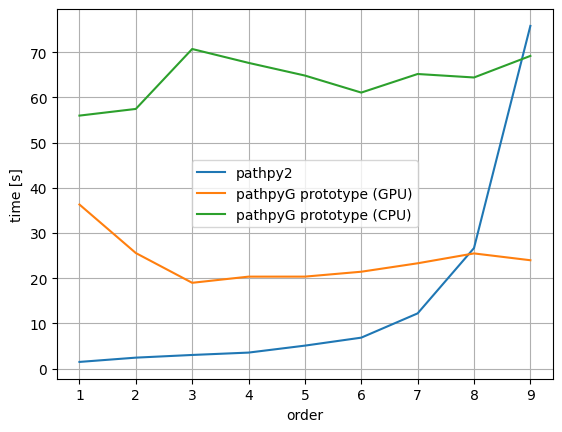

In [14]:
plt.plot(ks, times, label='pathpy2')
plt.plot(ks, times_new_gpu, label='pathpyG prototype (GPU)')
plt.plot(ks, times_new_cpu, label='pathpyG prototype (CPU)')
plt.xlabel('order')
plt.grid()
plt.ylabel('time [s]')
plt.legend()

(1, 100)

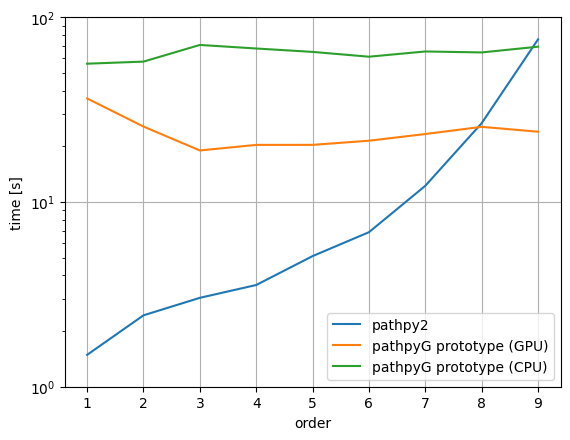

In [15]:
plt.plot(ks, times, label='pathpy2')
plt.plot(ks, times_new_gpu, label='pathpyG prototype (GPU)')
plt.plot(ks, times_new_cpu, label='pathpyG prototype (CPU)')
plt.xlabel('order')
plt.ylabel('time [s]')
plt.legend()
plt.grid()
plt.yscale('log')
plt.ylim(1,100)